# Uppgift 3

- Genomsnittligt fall per dag, från början av datsetet till slutet. Använder .sum få totalt antal fall och sedan använder jag .nunique för att få fram antal dagar i datsetet. Antal fall per dag i snitt, löser man med att ta Antal fall / Antal dagar.

In [91]:
import pandas as pd

excel_file_path = "Labb-data/Folkhalsomyndigheten_Covid19.xlsx"


df = pd.read_excel(excel_file_path, sheet_name=0)
total_cases = df["Totalt_antal_fall"].sum()
print(f"Antal fall: {total_cases}")

total_days = df["Statistikdatum"].nunique()
print(f"Antal dagar i datsetet: {total_days}")

average_cases_per_day = int(total_cases / total_days)
print(f"Genomsnittligt antal fall per dag: {average_cases_per_day}")

Antal fall: 2611580
Antal dagar i datsetet: 996
Genomsnittligt antal fall per dag: 2622


### Graf IVA
Linjedigramen visar perioder då flest hamnade i IVA eller avled och syftet med datan är för att få en överblick av dödligheten.

Koden läser in blad ett och två från covid19.xlsx. Gör om så datum för avliden och vårdstart blir bara datum för att enklare göra en graf. Kombinerar datum från blad ett och två tillsammans och gör en linjedigram.

In [201]:
import pandas as pd
import plotly.express as px

excel_file_path = "Labb-data/Folkhalsomyndigheten_Covid19.xlsx"

df = pd.read_excel(excel_file_path, sheet_name=1)

df_IVA = pd.read_excel(excel_file_path, sheet_name=2)


df.rename(columns={"Datum_avliden": "Datum"}, inplace=True)

df_IVA.rename(columns={"Datum_vårdstart": "Datum"}, inplace=True)

combined_df = pd.concat([df.set_index("Datum"), df_IVA.set_index("Datum")], axis=1)

combined_df = combined_df.reset_index()

fig = px.line(combined_df, x="Datum", 
              y=["Antal_avlidna", "Antal_intensivvårdade"], 
              labels={"value": "Antal", "variable": "Antal avlidna och i IVA"},
              title="Antal avlidna och patienter i intensivvården ")

fig.show()
# fig.write_html("check_mortality_rate.html")

### Antal nya fall och vaccinerade
Syftet med att jämföra fall med vaccination, är för att analysera hur effekttiv covid-19 vaccin är


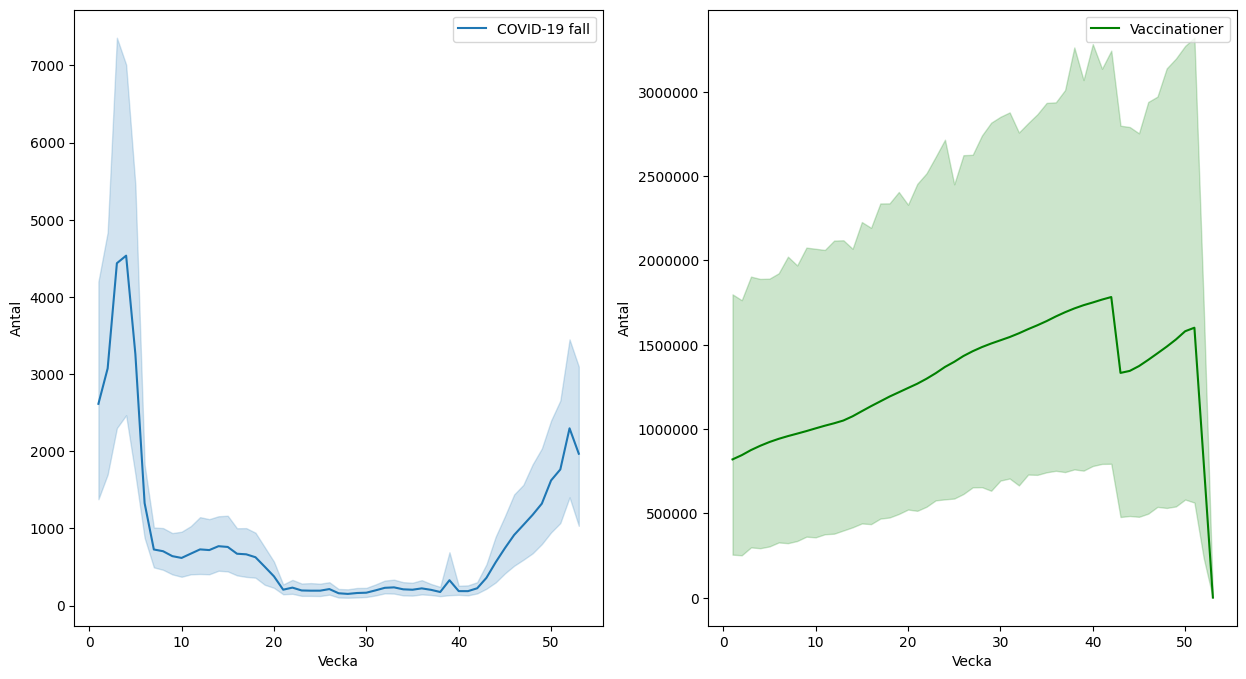

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

covid_data = pd.read_excel("Labb-data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name=6)

vaccine_data = pd.read_excel("Labb-data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name=0)

melted_covid_data = pd.melt(covid_data, id_vars=["veckonummer"], value_vars=["Antal_fall_vecka"])

melted_vaccine_data = pd.melt(vaccine_data, id_vars=["Vecka"], value_vars=["Antal vaccinationer"])

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

sns.lineplot(data=melted_covid_data, x="veckonummer", y="value", label="COVID-19 fall", ax=axes[0])
axes[0].set_ylabel("Antal")
axes[0].set_xlabel("Vecka")

sns.lineplot(data=melted_vaccine_data, x="Vecka", y="value", label="Vaccinationer", ax=axes[1], color="green")
axes[1].set_ylabel("Antal")
axes[1].get_yaxis().get_major_formatter().set_scientific(False) #remove exponential form

plt.show()

